# Imports & Data Reading

In [1]:
# Data loading
from google.colab import drive
import zipfile
import pandas as pd
import gdown
import pickle
# Preprocessing
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
# Feature extraction
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, LdaModel, CoherenceModel


# Util
from tqdm import tqdm
from pprint import pprint


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_URL = "https://drive.google.com/file/d/10YvMpIzRSi_GXg91TkrQBL_3JKC5dni7/view?usp=sharing"
PREPROCESSED_ARTICLES_URL = "https://drive.google.com/file/d/1-DQeGkgh-KmOe7uKFEmrj_GCqbKxNJbh/view?usp=sharing"
CORPUS_BOW_URL = "https://drive.google.com/file/d/1-I72t_8jqxIukAdEaxRSBMAYJyfNAT8m/view?usp=sharing"

In [4]:
gdown.download(DATA_URL, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=10YvMpIzRSi_GXg91TkrQBL_3JKC5dni7
To: /content/articles1.csv.zip
100%|██████████| 77.4M/77.4M [00:01<00:00, 39.8MB/s]


'articles1.csv.zip'

In [5]:
DATA_PATH = "articles1.csv.zip"

In [6]:
# Extract the CSV file from the zip archive
with zipfile.ZipFile(DATA_PATH, "r") as zip_ref:
    zip_ref.extractall()

# Load the CSV data into a Pandas DataFrame
df = pd.read_csv("articles1.csv")

In [7]:
df.head()

Unnamed: 0     id                                              title  \
0           0  17283  House Republicans Fret About Winning Their Hea...   
1           1  17284  Rift Between Officers and Residents as Killing...   
2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

      publication                         author        date    year  month  \
0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

   url                                            content  
0  NaN  WASHINGTON  —   Congressional Republicans have...  
1  NaN  After the bullet shells get counted, the blood...  
2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
3  NaN  Death may be the great equalizer, but it isn’t...  
4  NaN  SEOUL, South Korea  —   North Korea’s leader, ...

# Preprocessing

In [8]:
# Extract title and content as its preprocessing will differ from other features
articles =  df['title'] + ' ' + df['content']

In [9]:
articles[0]

'House Republicans Fret About Winning Their Health Care Suit - The New York Times WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporari

In [10]:
def preprocess_articles(articles):

  lemmatizer = WordNetLemmatizer()

  # Remove punctuations and convert text to lowercase
  words = gensim.utils.simple_preprocess(articles, deacc=True)
    
  # Remove stop words & punctuation 
  words = [word for word in words if word not in stop_words and word not in string.punctuation]
  # Lemmatize
  words = [lemmatizer.lemmatize(word) for word in words]

  # remove all non-word and non-space
  # words = re.sub(r'[^\w\s]', '', words) 

  return words


In [11]:
# tqdm.pandas()
# preprocessed_articles = articles.map(preprocess_articles)

Use below cell to save new preprocessed articles instead of loading already saved ones (don't forget to update `PREPROCESSED_ARTICLES_URL` with the new gdrive link)

In [12]:
# from joblib import Parallel, delayed
# preprocessed_articles = Parallel(n_jobs=4)(delayed(preprocess_articles)(article) for article in tqdm(articles, position=0, leave=True))
# preprocessed_articles = pd.Series(preprocessed_articles)
# pickle.dump(preprocessed_articles, open("preprocessed_articles.pkl", "wb"))
# !cp preprocessed_articles.pkl /content/drive/MyDrive/Edu/NLP

In [13]:
gdown.download(PREPROCESSED_ARTICLES_URL, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1-DQeGkgh-KmOe7uKFEmrj_GCqbKxNJbh
To: /content/preprocessed_articles.pkl
100%|██████████| 165M/165M [00:02<00:00, 66.3MB/s]


'preprocessed_articles.pkl'

In [14]:
preprocessed_articles = pickle.load(open("preprocessed_articles.pkl", "rb"))

In [15]:
preprocessed_articles[0]

['house',
 'republican',
 'fret',
 'winning',
 'health',
 'care',
 'suit',
 'new',
 'york',
 'time',
 'washington',
 'congressional',
 'republican',
 'new',
 'fear',
 'come',
 'health',
 'care',
 'lawsuit',
 'obama',
 'administration',
 'might',
 'win',
 'incoming',
 'trump',
 'administration',
 'could',
 'choose',
 'longer',
 'defend',
 'executive',
 'branch',
 'suit',
 'challenge',
 'administration',
 'authority',
 'spend',
 'billion',
 'dollar',
 'health',
 'insurance',
 'subsidy',
 'american',
 'handing',
 'house',
 'republican',
 'big',
 'victory',
 'issue',
 'sudden',
 'loss',
 'disputed',
 'subsidy',
 'could',
 'conceivably',
 'cause',
 'health',
 'care',
 'program',
 'implode',
 'leaving',
 'million',
 'people',
 'without',
 'access',
 'health',
 'insurance',
 'republican',
 'prepared',
 'replacement',
 'could',
 'lead',
 'chaos',
 'insurance',
 'market',
 'spur',
 'political',
 'backlash',
 'republican',
 'gain',
 'full',
 'control',
 'government',
 'stave',
 'outcome',
 'repu

In [16]:
def extract_features(articles, method='tf-idf'):
    if method == 'tf-idf':
        vectorizer = TfidfVectorizer()
        feature_vectors = vectorizer.fit_transform(articles)
        feature_names = vectorizer.get_feature_names_out()
    elif method == 'countvectorizer':
        vectorizer = CountVectorizer()
        feature_vectors = vectorizer.fit_transform(articles)
        feature_names = vectorizer.get_feature_names_out()
    else:
        raise ValueError('Invalid method specified.')
    # TODO:
      # Add word2vec
    
    return feature_vectors, feature_names

In [17]:
# number of unique tokens
total_tokens = preprocessed_articles.explode().nunique()
print(total_tokens)

152705


In [18]:
# create Dictionary from preprocessed articles
dictionary = Dictionary(preprocessed_articles)

# filter out tokens that appear too much or too little
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=150000)

Use below cell to save new corpus bows instead of loading already saved ones (don't forget to update `CORPUS_BOW_URL` with the new gdrive link)

In [19]:
# bag of words corpus from dictionary
#corpus_bow = Parallel(n_jobs=4)(delayed(dictionary.doc2bow)(article) for article in tqdm(preprocessed_articles, position=0, leave=True))
# pickle.dump(corpus_bow, open("corpus_bow.pkl", 'wb'))
# !cp corpus_bow.pkl /content/drive/MyDrive/Edu/NLP

In [20]:
gdown.download(CORPUS_BOW_URL, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1-I72t_8jqxIukAdEaxRSBMAYJyfNAT8m
To: /content/corpus_bow.pkl
100%|██████████| 74.1M/74.1M [00:01<00:00, 56.7MB/s]


'corpus_bow.pkl'

In [21]:
corpus_bow = pickle.load(open("corpus_bow.pkl", "rb"))

# Modelling

In [22]:
# create TF-IDF Model from corpus
tfidf = TfidfModel(corpus_bow)

# weighted tfidf corpus
corpus_tfidf = tfidf[corpus_bow]

In [23]:
# Apply LDA with 12 topics
lda_model = LdaModel(corpus=corpus_bow,
                     id2word=dictionary,
                     num_topics=12,
                     passes=10,
                     iterations=100)

In [24]:
topics = lda_model.show_topics(num_topics=12, num_words=12)
for topic in topics:
    print(topic)

(0, '0.023*"police" + 0.012*"officer" + 0.007*"told" + 0.007*"city" + 0.006*"gun" + 0.006*"according" + 0.006*"two" + 0.006*"man" + 0.006*"death" + 0.005*"shooting" + 0.005*"cnn" + 0.005*"authority"')
(1, '0.007*"like" + 0.006*"car" + 0.005*"could" + 0.005*"say" + 0.004*"tesla" + 0.004*"get" + 0.004*"water" + 0.004*"make" + 0.003*"even" + 0.003*"apple" + 0.003*"way" + 0.003*"much"')
(2, '0.014*"attack" + 0.008*"muslim" + 0.007*"group" + 0.007*"country" + 0.006*"isi" + 0.006*"terrorist" + 0.005*"government" + 0.005*"state" + 0.004*"minister" + 0.004*"islamic" + 0.004*"european" + 0.004*"killed"')
(3, '0.014*"game" + 0.011*"team" + 0.008*"first" + 0.007*"player" + 0.007*"flight" + 0.006*"season" + 0.006*"sport" + 0.005*"two" + 0.005*"airline" + 0.005*"plane" + 0.005*"win" + 0.005*"cnn"')
(4, '0.053*"trump" + 0.014*"president" + 0.009*"news" + 0.009*"donald" + 0.008*"obama" + 0.008*"white" + 0.006*"medium" + 0.005*"twitter" + 0.005*"political" + 0.005*"speech" + 0.005*"mr" + 0.005*"campai

In [25]:
# Apply LDA with 20 topics
lda_model_20 = LdaModel(corpus=corpus_bow,
                     id2word=dictionary,
                     num_topics=20,
                     passes=15,
                     iterations=100)

In [26]:
topics = lda_model_20.show_topics(num_topics=20, num_words=15)
for topic in topics:
    print(topic)

(0, '0.020*"show" + 0.012*"film" + 0.011*"star" + 0.010*"movie" + 0.006*"music" + 0.006*"tv" + 0.006*"actor" + 0.006*"series" + 0.005*"cnn" + 0.005*"hollywood" + 0.005*"award" + 0.005*"best" + 0.005*"song" + 0.005*"first" + 0.005*"night"')
(1, '0.015*"clinton" + 0.010*"email" + 0.010*"investigation" + 0.009*"fbi" + 0.009*"official" + 0.008*"intelligence" + 0.008*"russian" + 0.008*"comey" + 0.007*"russia" + 0.007*"house" + 0.007*"former" + 0.007*"information" + 0.007*"department" + 0.006*"committee" + 0.006*"report"')
(2, '0.092*"trump" + 0.025*"president" + 0.017*"obama" + 0.016*"donald" + 0.008*"white" + 0.008*"american" + 0.007*"campaign" + 0.006*"country" + 0.006*"america" + 0.005*"house" + 0.005*"think" + 0.005*"u" + 0.005*"presidential" + 0.005*"going" + 0.005*"speech"')
(3, '0.040*"clinton" + 0.025*"trump" + 0.017*"republican" + 0.016*"campaign" + 0.015*"hillary" + 0.013*"state" + 0.013*"voter" + 0.013*"candidate" + 0.011*"election" + 0.011*"cruz" + 0.011*"party" + 0.011*"vote" +

In [27]:
# Apply LDA with TF-IDF and 12 topics
lda_model_tfidf = LdaModel(corpus_tfidf,
                           id2word=dictionary,
                           num_topics=12,
                           passes=10,
                           iterations=100)

In [28]:
# Print the top 12 topics
topics = lda_model_tfidf.show_topics(num_topics=12, num_words=15)
for topic in topics:
    print(topic)

(0, '0.005*"trump" + 0.003*"clinton" + 0.002*"republican" + 0.002*"obama" + 0.002*"u" + 0.002*"campaign" + 0.002*"president" + 0.001*"cnn" + 0.001*"house" + 0.001*"donald" + 0.001*"hillary" + 0.001*"election" + 0.001*"state" + 0.001*"say" + 0.001*"white"')
(1, '0.016*"zika" + 0.014*"cosby" + 0.012*"virus" + 0.008*"cdc" + 0.007*"vaccine" + 0.006*"outbreak" + 0.006*"mosquito" + 0.005*"disease" + 0.005*"infection" + 0.004*"tulsa" + 0.004*"puerto" + 0.004*"constand" + 0.004*"rico" + 0.004*"infected" + 0.003*"microcephaly"')
(2, '0.018*"eu" + 0.011*"duterte" + 0.008*"lgbt" + 0.007*"palin" + 0.007*"wallace" + 0.007*"tapper" + 0.006*"philippine" + 0.006*"doj" + 0.005*"schultz" + 0.005*"santorum" + 0.005*"giuliani" + 0.005*"reynolds" + 0.004*"photography" + 0.004*"msnbc" + 0.004*"schilling"')
(3, '0.014*"climate" + 0.009*"epa" + 0.009*"nasa" + 0.008*"venezuela" + 0.006*"planet" + 0.006*"galaxy" + 0.006*"asteroid" + 0.006*"maduro" + 0.005*"venezuelan" + 0.005*"carbon" + 0.005*"pruitt" + 0.005*"

In [29]:
# apply Non-negative matrix Factorizaion with TF-IDF and 15 topics
nmf_model = gensim.models.Nmf(corpus=corpus_tfidf,
                              id2word=dictionary,
                              num_topics = 15,
                              random_state = 42
                              )

In [30]:
nmf_model.show_topics(num_topics=15, num_words=15)

[(0,
  '0.010*"zika" + 0.007*"health" + 0.006*"virus" + 0.005*"dr" + 0.005*"drug" + 0.005*"patient" + 0.004*"abortion" + 0.004*"disease" + 0.004*"doctor" + 0.003*"medical" + 0.003*"mosquito" + 0.003*"study" + 0.003*"rio" + 0.003*"olympic" + 0.003*"athlete"'),
 (1,
  '0.012*"police" + 0.008*"student" + 0.007*"officer" + 0.006*"school" + 0.006*"gun" + 0.004*"shooting" + 0.004*"texas" + 0.004*"black" + 0.003*"campus" + 0.003*"university" + 0.003*"city" + 0.003*"suspect" + 0.003*"shot" + 0.003*"county" + 0.003*"child"'),
 (2,
  '0.017*"comey" + 0.011*"fbi" + 0.009*"court" + 0.008*"investigation" + 0.007*"justice" + 0.007*"mr" + 0.006*"attorney" + 0.006*"email" + 0.005*"department" + 0.005*"judge" + 0.005*"case" + 0.004*"prosecutor" + 0.004*"federal" + 0.004*"director" + 0.004*"law"'),
 (3,
  '0.027*"israel" + 0.016*"palestinian" + 0.016*"israeli" + 0.012*"netanyahu" + 0.010*"jerusalem" + 0.008*"police" + 0.007*"settlement" + 0.007*"briefing" + 0.007*"jewish" + 0.006*"resolution" + 0.006*"o

## Model Evaluation

In [40]:
# Coherence Score for NMF Model
coherence_model_nmf = CoherenceModel(model=nmf_model, texts=preprocessed_articles, dictionary=dictionary, coherence='c_v')
coherence_nmf = coherence_model_nmf.get_coherence()
print(f'Coherence Score of NMF model: {coherence_nmf:.2f}')

Coherence Score of NMF model: 0.64


In [41]:
# Coherence Score for LDA with 20 topics
coherence_model_lda_20 = CoherenceModel(model=lda_model_20, texts=preprocessed_articles, dictionary=dictionary, coherence='c_v')
coherence_lda_20 = coherence_model_lda_20.get_coherence()
print(f'Coherence Score of LDA model with 20 topics: {coherence_lda_20: .2f}')

Coherence Score of LDA model with 20 topics:  0.58


In [42]:
# Coherence Score for LDA Model with 12 topics
coherence_model_lda_12 = CoherenceModel(model=lda_model, texts=preprocessed_articles, dictionary=dictionary, coherence='c_v')
coherence_lda_12 = coherence_model_lda_12.get_coherence()
print(f'Coherence Score of LDA model with 12 topics: {coherence_lda_12:.2f}')

Coherence Score of LDA model with 12 topics: 0.52


### Results Visualization

In [46]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def show_word_cloud(model):

    num_topics = model.num_topics
    top_n_words = 20

    num_rows = (num_topics + 1) // 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))

    for topic_id in range(num_topics):
        # Get the top N words and their corresponding probabilities for the current topic
        topic_words = model.show_topic(topic_id, topn=top_n_words)
        word_freq = {word: freq for word, freq in topic_words}

        # Create the word cloud for the current topic
        wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)

        # Plot the word cloud
        row_idx = topic_id // 2
        col_idx = topic_id % 2
        axs[row_idx, col_idx].imshow(wordcloud, interpolation="bilinear")
        axs[row_idx, col_idx].set_title(f"Topic {topic_id}")
        axs[row_idx, col_idx].axis("off")

    # If there are any empty subplots, remove them
    if num_topics % 2 == 1:
        axs[num_rows - 1, 1].axis("off")

    plt.tight_layout()
    plt.show()


#### Most frequent words in topics according to NMF model

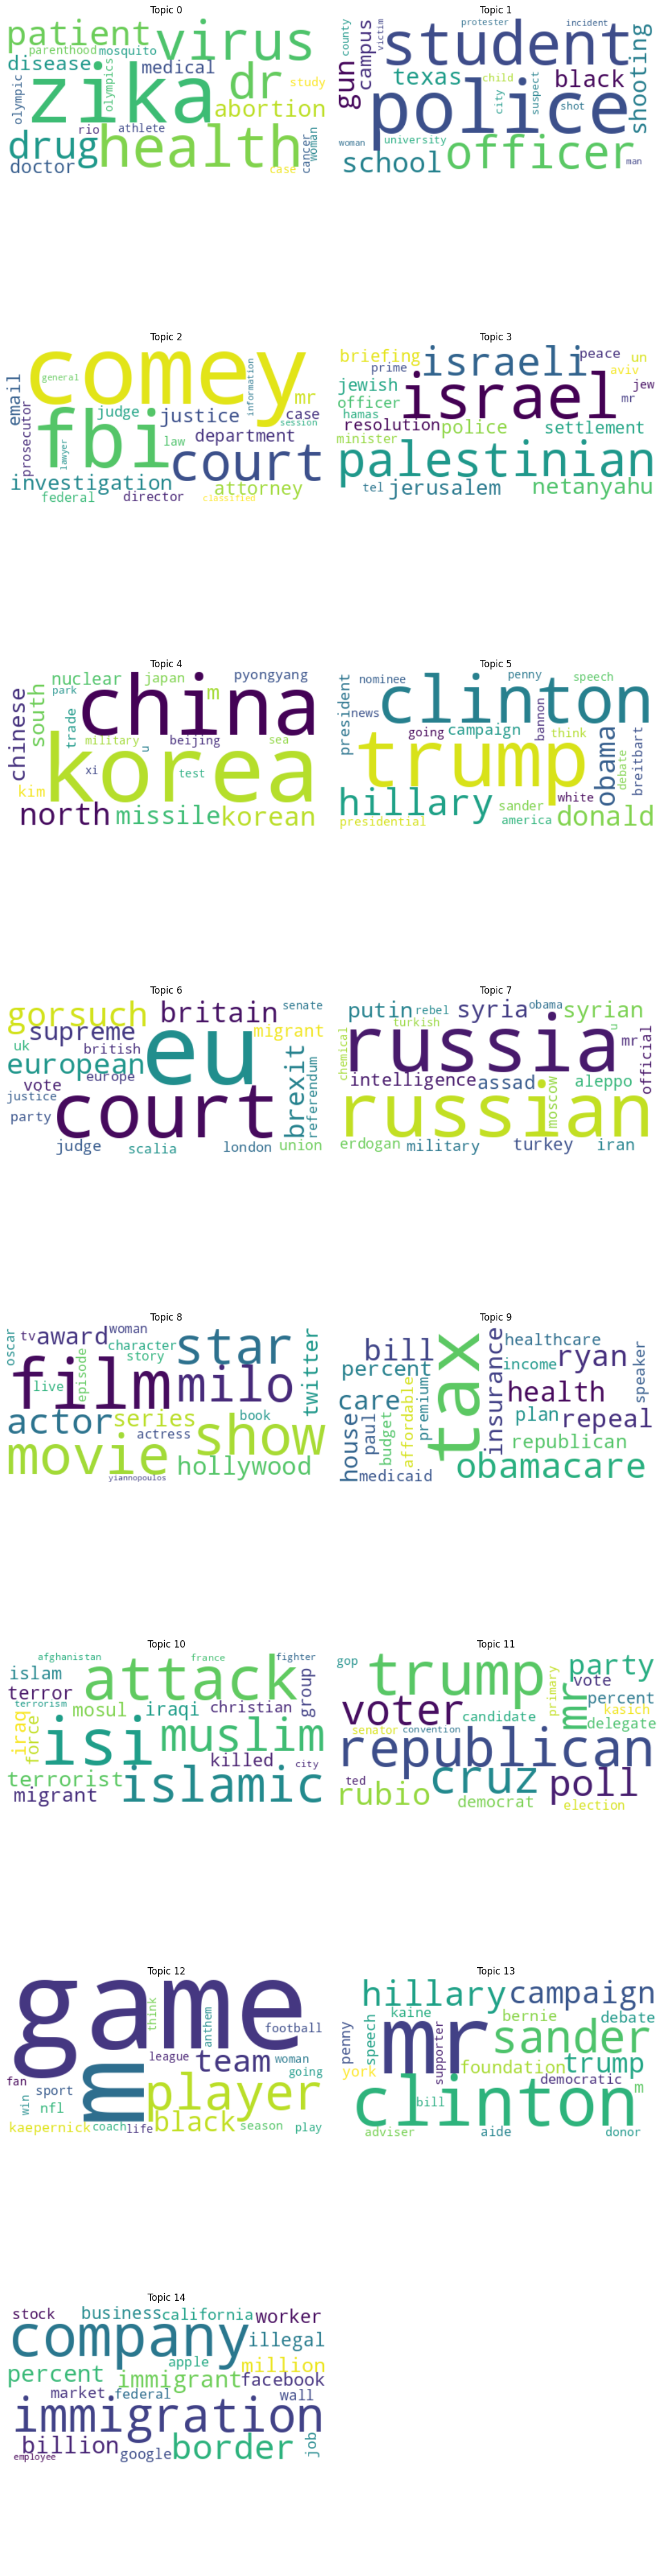

In [48]:
show_word_cloud(nmf_model)

#### Most frequent words in topics according to LDA model trained with 20 topics

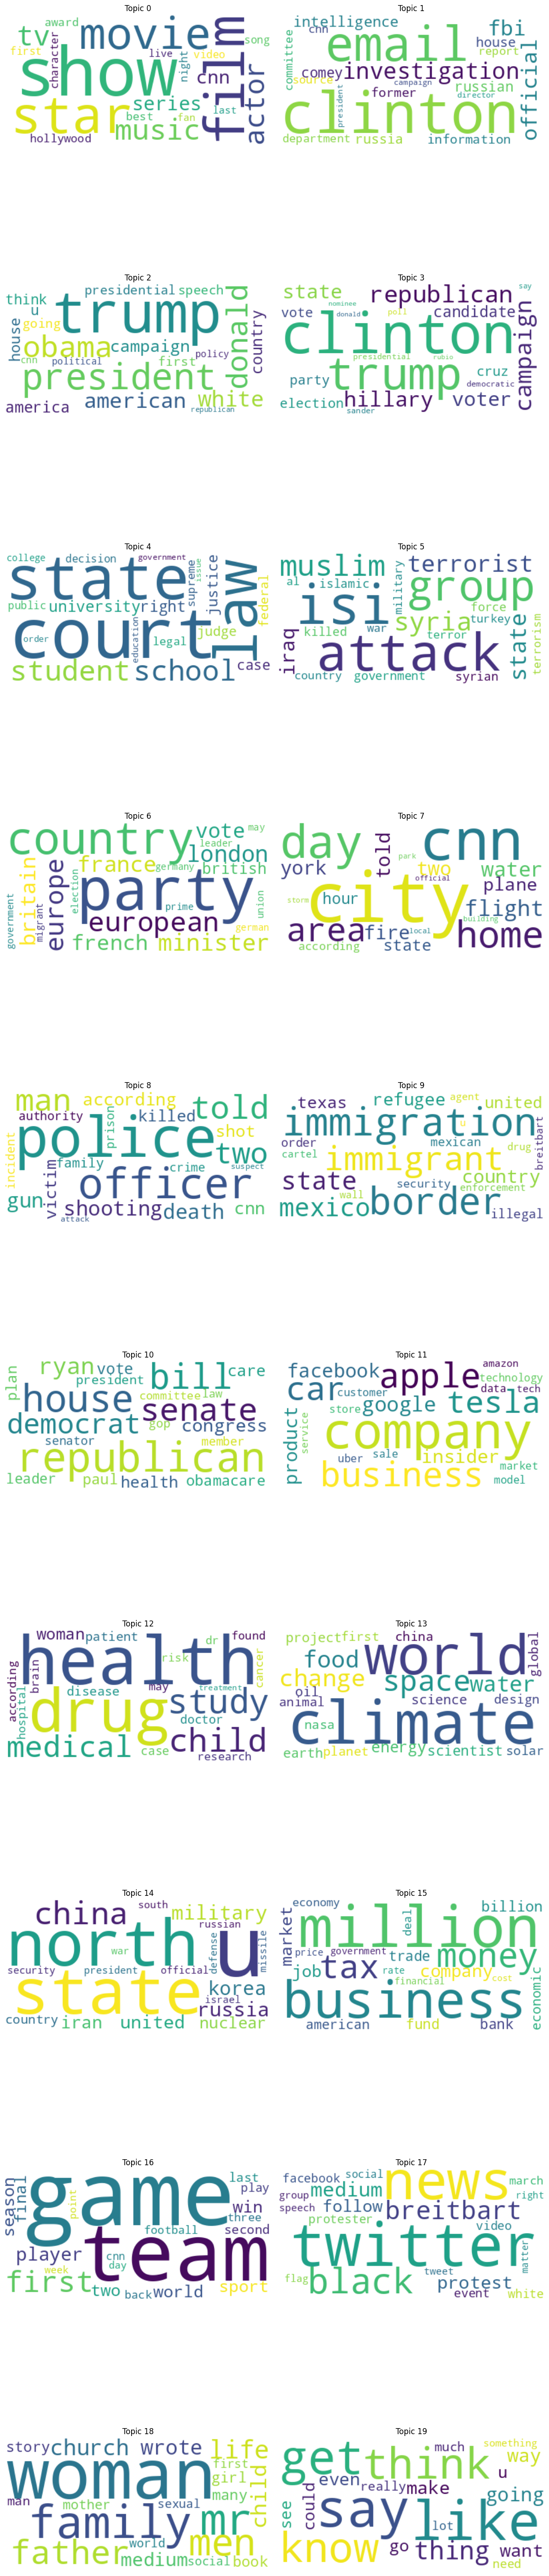

In [47]:
show_word_cloud(lda_model_20)